In [9]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# read data
data = pd.read_csv('../data/reduced_bridge_statistic_germany.csv', sep=';')

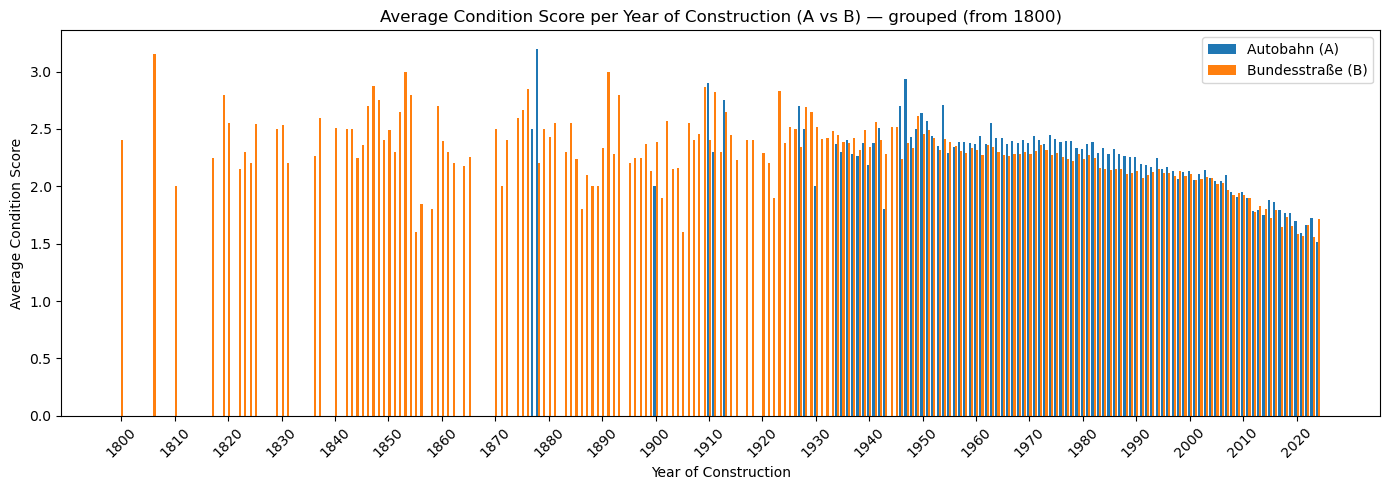

In [12]:
# filter rows with required values
df = data.dropna(subset=['Baujahr Überbau','Zustandsnote','Zugeordneter Sachverhalt vereinfacht']).copy()

# compute mean condition per year and type (A/B)
grouped = df.groupby(['Baujahr Überbau','Zugeordneter Sachverhalt vereinfacht'])['Zustandsnote'].mean().unstack()

# define full year range starting at 1800
max_year = int(grouped.index.max()) if pd.notna(grouped.index.max()) else 2025
if max_year < 1800:
    max_year = 2025
full_years = np.arange(1800, max_year+1)

# reindex to include all years (missing years will be NaN)
grouped = grouped.reindex(full_years)

# get series for A and B (NaN if missing)
values_A = grouped['A'] if 'A' in grouped.columns else pd.Series(np.nan, index=full_years)
values_B = grouped['B'] if 'B' in grouped.columns else pd.Series(np.nan, index=full_years)

# positions for grouped bars
x = np.arange(len(full_years))
width = 0.4

plt.figure(figsize=(14,5))
plt.bar(x - width/2, values_A, width, label='Autobahn (A)', color='C0')
plt.bar(x + width/2, values_B, width, label='Bundesstraße (B)', color='C1')

# readability: show every 10th year tick
tick_idx = np.arange(0, len(full_years), 10)
plt.xticks(tick_idx, full_years[tick_idx], rotation=45)

plt.xlabel('Year of Construction')
plt.ylabel('Average Condition Score')
plt.title('Average Condition Score per Year of Construction (A vs B) — grouped (from 1800)')
plt.legend()
plt.tight_layout()
plt.show()